# Vibrations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, display
from ipywidgets import FloatSlider, Button, VBox, HBox, interactive_output, FloatText, IntText, BoundedFloatText, Layout
from scipy.integrate import odeint
from IPython.display import display, Math, clear_output
import ipywidgets as widgets

%matplotlib inline

### Question

The domestic wind turbine described in question 2 of the free vibration problem sheet operates at a variable speed (since it does not have variable pitch rotor blades).  Its maximum operating speed is 600 rpm.  The turbine blades are 30cm long and have a mass of 0.1 kg each. 
 
Recall from the previous sheet that the equivalent mass and stiffness of the system are 10 kg and 1880 N/m respectively, giving an undamped natural frequency of 2.18 Hz

<p align="center">
  <img src="../images/problem-description.png" width="400">
</p>


(i) One of the blades cracks at the root and breaks off completely causing the rotor to become unbalanced.  Calculate the rotation speed at which the transverse vibration of the pole is maximum, and state any assumptions that you make. 

(ii) Assuming that the blade has a uniform mass distribution along its length, calculate the out-of-balance force at the rotation speed identified in part (i). 

(iii) The mode of vibration has a damping ratio of 0.02.  Calculate the amplitude of vibration at the top of the pole at the rotation speed identified in part (i). 

(iv) State whether the pole vibration is mass, stiffness or damping controlled when the turbine is operating at its maximum operating speed.  Hence calculate the amplitude of vibration at the top of the pole at this speed when the turbine is missing a blade. 

### Input parameters

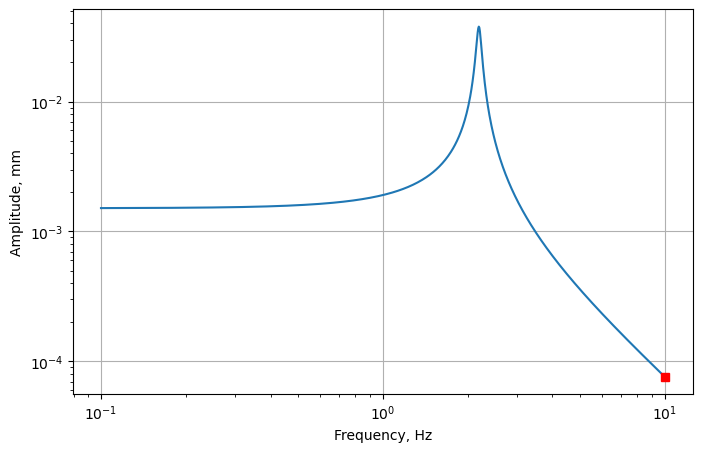

In [2]:
# Numeric input for Force

# Input boxes
system_mass = FloatText(
    value=10, 
    description='System mass, kg:',
    layout=Layout(width='250px'),
    style={'description_width': '150px'}
)

blade_mass = FloatText(
    value=0.1, 
    description='Engine mass, kg:',
    layout=Layout(width='250px'),
    style={'description_width': '150px'}
)

stiffness = FloatText(
    value=1880,
    description='Stiffness, N/m',
    layout=Layout(width='250px'),
    style={'description_width': '150px'}
)

eccentricity = FloatText(
    value=0.15,
    description='Eccentricity, m',
    layout=Layout(width='250px'),
    style={'description_width': '150px'}
)

damping_ratio = FloatText(
    value=0.02,
    description='Damping ratio',
    layout=Layout(width='250px'),
    style={'description_width': '150px'}
)

rotor_speed = FloatText(
    value=600,
    description='Rotor speed, rpm',
    layout=Layout(width='250px'),
    style={'description_width': '150px'}
)


ndec = IntText(
    value=2,
    description='Decimal places',
    layout=Layout(width='250px'),
    style={'description_width': '150px'}
)


# Output box
frequency = FloatText(
    value=np.round(1/(2*np.pi)*np.sqrt(stiffness.value/(system_mass.value-blade_mass.value)), ndec.value),
    description='Frequency, Hz:',
    layout=Layout(width='300px'),
    style={'description_width': '150px'},
    disabled=True  # make read-only
)

angular_speed = FloatText(
    value=2*np.pi*frequency.value, 
    description='Angular speed (rad/s):',
    layout=Layout(width='250px'),
    style={'description_width': '150px'},
    disabled=True  # make read-only
)

Force = FloatText(
    value=blade_mass.value*eccentricity.value*angular_speed.value**2,
    description='Force, N:',
    layout=Layout(width='300px'),
    style={'description_width': '150px'},
    disabled=True  # make read-only
)

damp_crit = FloatText(
    value=np.round(2*np.sqrt(stiffness.value*(system_mass.value-blade_mass.value)), ndec.value),
    description='Critical damping, Ns/m:',
    layout=Layout(width='300px'),
    style={'description_width': '150px'},
    disabled=True  # make read-only
)

damp_coeff = FloatText(
    value=damping_ratio.value*damp_crit.value,
    description='Damping coeff., Ns/m',
    layout=Layout(width='300px'),
    style={'description_width': '150px'},
    disabled=True  # make read-only
)

# Example: assume your widgets (system_mass, blade_mass, stiffness, damping_ratio, etc.) already exist
# Add an output area for the formula
results_output = widgets.Output()
plot_output = widgets.Output()

# Update function (keeps your stiffness logic + adds formula update)
def update_output(*args):
    try:
        frequency.value     = np.round(1/(2*np.pi)*np.sqrt(stiffness.value/(system_mass.value-blade_mass.value)), ndec.value)
        angular_speed.value = 2*np.pi*frequency.value
        Force.value         = blade_mass.value*eccentricity.value*angular_speed.value**2
        damp_crit.value     = np.round(2*np.sqrt(stiffness.value*(system_mass.value-blade_mass.value)), ndec.value)
        damp_coeff.value    = damping_ratio.value*damp_crit.value
    except ZeroDivisionError:
        frequency.value = float('inf')
        angular_speed.value = float('inf')
        Force.value = float('inf')
        damp_crit.value = float('inf')
        damp_coeff.value = float('inf')

    # Update LaTeX display
    with results_output:
        clear_output(wait=True)
        # New Natural frequency
        display(Math(r"""
                \text{(i) The undamped natural frequency will increase slightly due to the loss of mass of the blade.}
                """))
        display(Math(r"""
                \text{The new natural frequency is given by:}
                """))
        display(Math(
            rf"f_n = \frac{{1}}{{2\pi}}\sqrt{{\frac{{k}}{{m}}}}"
            rf"    = \frac{{1}}{{2\pi}}\sqrt{{\frac{{{stiffness.value}}}{{{system_mass.value}-{blade_mass.value}}}}}"
            rf"    = {np.round(frequency.value,ndec.value)} Hz"
            
        ))
        

        display(Math(r""" \text{The frequency of the out-of-balance force is the same as the rotation speed of the turbine.} """)) 
        display(Math(r""" \text{If we assume that the resonance frequency is close to the natural frequency (i.e. low damping) } """)) 
        display(Math(r""" \text{then resonance will occur at a rotation speed of } """))
   
        display(Math(
            rf"{np.round(frequency.value,ndec.value)}~\mathrm{{Hz}} \times {60} sec = {np.round(frequency.value*60,ndec.value)} ~\mathrm{{rpm}}"))
        
        print('\n\n')
        # ----------------------------------------------------------
        # Net force
        display(Math(r"""
                \text{(ii) Assuming that the turbine is perfectly balanced until the blade breaks off,}
                """))
        display(Math(r"""
                \text{then the magnitude of the out of balance force without the blade is}
                """))
          
        
        display(Math(
            f"F = m_e \\varepsilon \\omega^2 "
            f"= {blade_mass.value} \\times {eccentricity.value} "
            f"\\times (2\\pi \\times {np.round(frequency.value, ndec.value)})^2 "
            f"= {np.round(Force.value, ndec.value)}\\,\\mathrm{{N}}"
        ))
        
        display(Math(r""" \text{since the centre of mass of the missing blade is 0.15m from the axis of rotation. } """))
        # ----------------------------------------------------------
        
        print("\n")
        display(Math(r"""
        \text{(iii) The frequency response is:} \\
        \left| \frac{X}{F} \right| = \frac{1}{-\omega^2 m + j\omega c + k}
        """))
        
        display(Math(r"""
        \text{Damping is light so assume that resonance occurs when } \omega = \omega_n
        """))
        
        display(Math(r"""
        \therefore \quad
        \frac{X}{F} \approx \frac{1}{j \omega c}
        \quad \text{and} \quad
        \left|\frac{X}{F}\right| = \frac{1}{\omega c}
        """))
        # ----------------------------------------------------------
        # Critical damping - form 1
        display(Math(r""" \text{The critical damping coefficient is: } """))
        display(Math(
            rf"c_{{crit}} = 2m\omega_n = 2 \times {system_mass.value-blade_mass.value}"
            rf"\times 2\pi \times {np.round(frequency.value, ndec.value)}"
            rf" = {np.round(2*(system_mass.value-blade_mass.value)*2*np.pi*frequency.value, ndec.value)}~\mathrm{{Ns/m}}"
        ))
        display(Math(r""" \text{or: } """))
        # Critical damping - form 2
        display(Math(
            rf"c_{{crit}} = 2\sqrt{{km}} = 2\sqrt{{{stiffness.value}\times({system_mass.value-blade_mass.value})}}"
            rf" = {np.round(2*np.sqrt(stiffness.value*(system_mass.value-blade_mass.value)), ndec.value)}~\mathrm{{Ns/m}}"
        ))
        display(Math(r""" \text{And so the damping coefficient: } """))
        # Damping coefficient
        display(Math(
            rf"c = \zeta c_{{crit}} = {damping_ratio.value}\times {np.round(damp_crit.value, ndec.value)}"
            rf" = {np.round(damp_crit.value*damping_ratio.value, ndec.value)}~\mathrm{{Ns/m}}"
        ))
        
        # Calulate amplitude of vibration
        abs_displacement = 1/(2*np.pi*frequency.value*damp_coeff.value)*Force.value
        print("\nTherefore:\n")
        display(Math(fr"\left| X \right| = \left| \frac{{X}}{{F}} \right| \, \left| F \right| \approx"
                     fr" \frac{1}{{2\pi \times {np.round(frequency.value,ndec.value)}\times {np.round(damp_coeff.value,ndec.value)}}}{np.round(Force.value,ndec.value)}"
                     fr"={np.round(abs_displacement*1e3,ndec.value)}~mm"))
        # ----------------------------------------------------------
        # ----------------------------------------------------------
        print("\n\n")
        
        display(Math(r""" \text{For given values only (Try other values and check when the following would not apply): } """))
        
        display(Math(r""" \text{(iv) At 600 rpm the excitation frequency is 10 Hz which is much higher than the natural frequency of 2.19 Hz so the system is mass controlled. : } """))
        
        display(Math(r"""
        \left| \frac{X}{F} \right| \approx \frac{1}{-\omega^2 m}
        """))
        display(Math(rf"""
        \text{{Where }} m = {system_mass.value - blade_mass.value}\,\text{{ kg is the equivalent mass and }} \; F = m_{{\varepsilon}} \varepsilon \omega^2
        """))

        display(Math(rf"""
        \text{{so }} \left|X\right| 
        = \frac{{m_{{\varepsilon}}\varepsilon \omega^2}}{{\omega^2 m}}
        = \frac{{m_{{\varepsilon}}\varepsilon}}{{m}}
        = \frac{{{blade_mass.value} \times {eccentricity.value}}}{{{system_mass.value - blade_mass.value}}} 
        = {np.round((blade_mass.value)*eccentricity.value/(system_mass.value - blade_mass.value)*1e3,ndec.value)} ~\mathrm{{mm}}
        """))

        # Display LaTeX
        display(Math(f"""
        \\text{{so }} \\left|X\\right| 
        = \\frac{{m_{{\\varepsilon}} \\varepsilon \\omega^2}}{{\\omega^2 m}}
        = \\frac{{m_{{\\varepsilon}} \\varepsilon}}{{m}}
        = \\frac{{{blade_mass.value} \\times {eccentricity.value}}}{{{system_mass.value - blade_mass.value}}}
        = 
        """))

        
    with plot_output:
        clear_output(wait=True)
        fn_array = np.linspace(0.1, 10, 1000)  # avoid zero to prevent division by zero
        X = np.abs(1 / (-(2*np.pi*fn_array)**2*(system_mass.value-blade_mass.value)
                        + 1j*2*np.pi*fn_array*damp_coeff.value + stiffness.value))* Force.value
        # find location on plot
        find_idx = np.argmin(np.abs(rotor_speed.value/60-fn_array))
        plt.figure(figsize=(8,5))
        plt.plot(fn_array, X, label='X vs Frequency')
        plt.plot(fn_array[find_idx], X[find_idx], 'rs')
        plt.xlabel('Frequency, Hz')
        plt.ylabel('Amplitude, mm')
        # plt.title('Variation of X with Frequency')
        plt.grid(True)
        plt.yscale('log', base=10)
        plt.xscale('log', base=10)
        # plt.legend()
        plt.show()

# Link updates
for w in [system_mass, blade_mass, stiffness, eccentricity, damping_ratio, ndec, rotor_speed]:
    w.observe(update_output, names='value')


# Layout
ui1 = VBox([
    HBox([system_mass, blade_mass, stiffness]),
    HBox([eccentricity, damping_ratio, ndec]),
    rotor_speed,
])


ui2 = VBox([
    results_output,
    plot_output# all results shown here
])

display(ui1)
# Run once to initialize
update_output()

display(ui2)